In [1]:
path = 'https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Brasileirao/Cruzeiro/Cruzeiro_Atletico_15102025/df_cruzeiro.csv'

In [9]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [3]:
data = pd.read_csv(path, sep=';')

In [4]:
data.head()

,Jogador,Minutes,PrgC,PrgP,G+A,Gls,xG,TklW,Int,SCA,Succ Take-Ons
0,Matheus Pereira,2011,58,130,12,5,3.2,26,10,149,26
1,Kaiki,2203,50,79,4,1,3.1,60,32,46,28
2,Wanderson,1693,48,35,2,0,2.2,7,6,63,33
3,Kaio Jorge,1963,43,29,21,15,12.4,6,5,55,22
4,Lucas Silva,2008,29,129,4,2,0.7,26,10,49,17


In [5]:
data.columns

Index(['Jogador', 'Minutes', 'PrgC', 'PrgP', 'G+A', 'Gls', 'xG', 'TklW', 'Int',
       'SCA', 'Succ Take-Ons'],
      dtype='object')

In [7]:
# Métricas por 90 minutos
data['TklW/90'] = (data['TklW'] * 90) / (data['Minutes'])
data['Int/90'] = (data['Int'] * 90) / (data['Minutes'])
data['PrgC/90'] = (data['PrgC'] * 90) / (data['Minutes'])
data['PrgP/90'] = (data['PrgP'] * 90) / (data['Minutes'])
data['G+A/90'] = (data['G+A'] * 90) / (data['Minutes'])
data['Gls/90'] = (data['Gls'] * 90) / (data['Minutes'])
data['SCA/90'] = (data['SCA'] * 90) / (data['Minutes'])
data['Succ Take-Ons/90'] = (data['Succ Take-Ons'] * 90) / (data['Minutes'])
data['xG/90'] = (data['xG'] * 90) / (data['Minutes'])

In [8]:
data.head()

,Jogador,Minutes,PrgC,PrgP,G+A,Gls,xG,TklW,Int,SCA,Succ Take-Ons,TklW/90,Int/90,PrgC/90,PrgP/90,G+A/90,Gls/90,SCA/90,Succ Take-Ons/90,xG/90
0,Matheus Pereira,2011,58,130,12,5,3.2,26,10,149,26,1.163600,0.447539,2.595724,5.818001,0.537046,0.223769,6.668324,1.163600,0.143212
1,Kaiki,2203,50,79,4,1,3.1,60,32,46,28,2.451203,1.307308,2.042669,3.227417,0.163414,0.040853,1.879256,1.143895,0.126645
2,Wanderson,1693,48,35,2,0,2.2,7,6,63,33,0.372120,0.318960,2.551683,1.860602,0.106320,0.000000,3.349084,1.754282,0.116952
3,Kaio Jorge,1963,43,29,21,15,12.4,6,5,55,22,0.275089,0.229241,1.971472,1.329598,0.962812,0.687723,2.521651,1.008660,0.568518
4,Lucas Silva,2008,29,129,4,2,0.7,26,10,49,17,1.165339,0.448207,1.299801,5.781873,0.179283,0.089641,2.196215,0.761952,0.031375


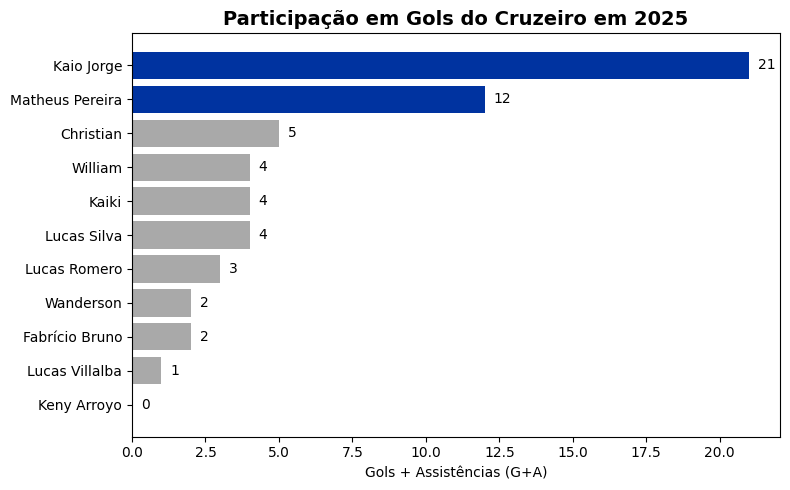

In [13]:
# Ordenar e definir cores
df_sorted = data.sort_values('G+A', ascending=False)
colors = ['#0033A0' if p in ['Matheus Pereira', 'Kaio Jorge'] else '#A9A9A9' for p in df_sorted['Jogador']]

plt.figure(figsize=(8, 5))
bars = plt.barh(df_sorted['Jogador'], df_sorted['G+A'], color=colors)
plt.xlabel('Gols + Assistências (G+A)')
plt.title('Participação em Gols do Cruzeiro em 2025', fontsize=14, weight='bold')

# Anotações
for i, v in enumerate(df_sorted['G+A']):
    plt.text(v + 0.3, i, str(v), va='center', fontsize=10)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

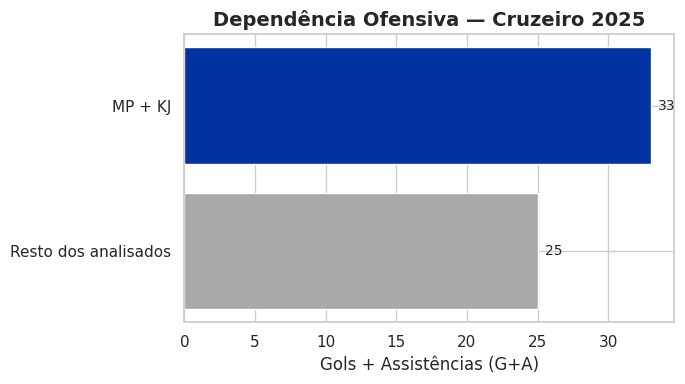

In [43]:
# Calcular totais
dupla = data[data['Jogador'].isin(['Matheus Pereira', 'Kaio Jorge'])]['G+A'].sum()
resto = data[~data['Jogador'].isin(['Matheus Pereira', 'Kaio Jorge'])]['G+A'].sum()

# Criar DataFrame simplificado
df_dupla = pd.DataFrame({
    'Grupo': ['MP + KJ', 'Resto dos analisados'],
    'G+A': [dupla, resto]
})

# Cores
colors = ['#0033A0', '#A9A9A9']

plt.figure(figsize=(7,4))
bars = plt.barh(df_dupla['Grupo'], df_dupla['G+A'], color=colors)
plt.xlabel('Gols + Assistências (G+A)')
plt.title('Dependência Ofensiva — Cruzeiro 2025', fontsize=14, weight='bold')

# Adicionar anotações
for i, v in enumerate(df_dupla['G+A']):
    plt.text(v + 0.5, i, str(v), va='center', fontsize=10)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

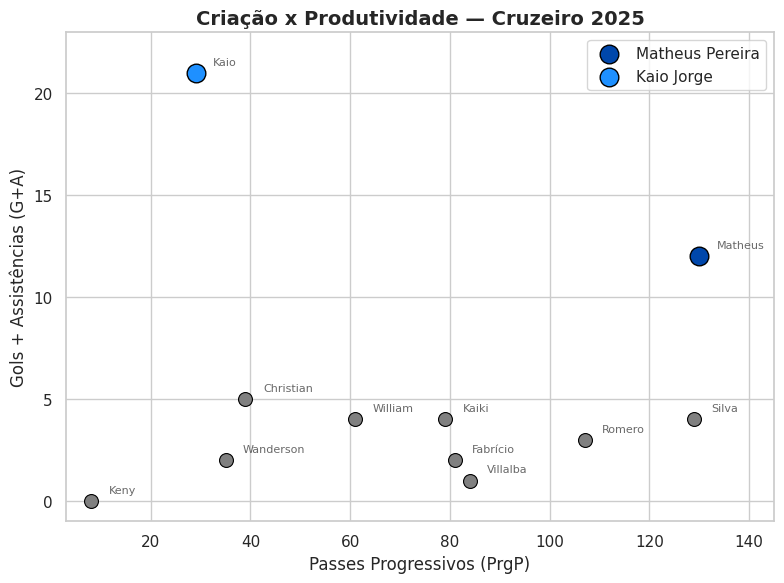

In [22]:
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")

# Scatter base
sns.scatterplot(data=data, x='PrgP', y='G+A', s=100, color='gray', edgecolor='black')

# Destaques (Matheus Pereira e Kaio Jorge)
for player, color in [('Matheus Pereira', '#0047AB'), ('Kaio Jorge', '#1E90FF')]:
    sub = data[data['Jogador'] == player]
    plt.scatter(sub['PrgP'], sub['G+A'], s=180, color=color, label=player, edgecolor='black', zorder=3)

# Rótulos com deslocamento fixo (padronizado)
for _, row in data.iterrows():
    nome = row['Jogador']
    label = nome.split()[1] if nome.startswith("Lucas ") else nome.split()[0]
    plt.text(row['PrgP'] + 3.5, row['G+A'] + 0.4, label,
             fontsize=8, fontweight='medium', color='dimgray')

# Ajustar limites para evitar corte
x_min, x_max = data['PrgP'].min(), data['PrgP'].max()
plt.xlim(x_min - 5, x_max + 15)  # margem extra no lado direito
y_min, y_max = data['G+A'].min(), data['G+A'].max()
plt.ylim(y_min - 1, y_max + 2)

plt.xlabel('Passes Progressivos (PrgP)')
plt.ylabel('Gols + Assistências (G+A)')
plt.title('Criação x Produtividade — Cruzeiro 2025', fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

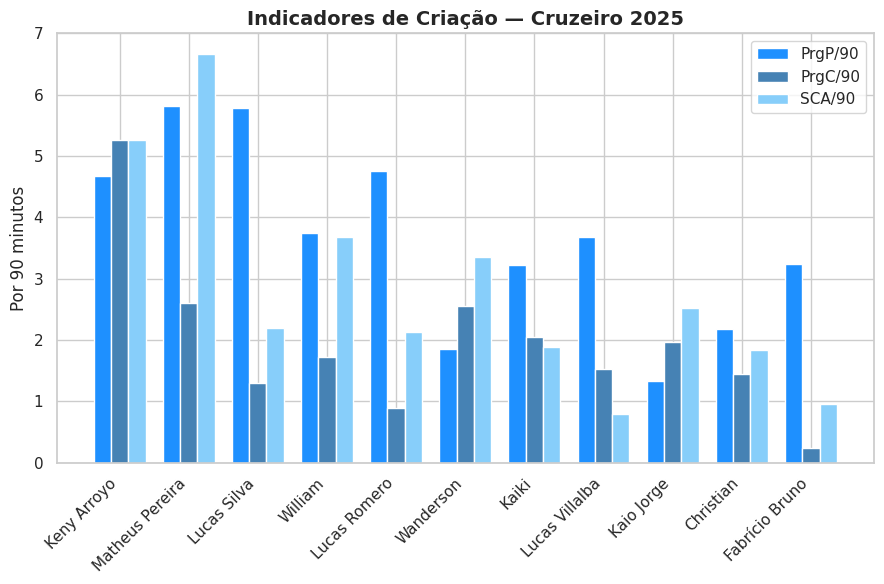

In [34]:
# Selecionar colunas relevantes e calcular soma
cols = ['Jogador', 'PrgP/90', 'PrgC/90', 'SCA/90']
df_plot = data[cols].copy()
df_plot['Criação_Total'] = df_plot['PrgP/90'] + df_plot['PrgC/90'] + df_plot['SCA/90']

# Ordenar do maior para o menor
df_plot = df_plot.sort_values('Criação_Total', ascending=False).reset_index(drop=True)

# Eixo x e largura
x = np.arange(len(df_plot))
width = 0.25

plt.figure(figsize=(9,6))

# Barras agrupadas (ordenadas)
plt.bar(x - width, df_plot['PrgP/90'], width, label='PrgP/90', color='#1E90FF')
plt.bar(x, df_plot['PrgC/90'], width, label='PrgC/90', color='#4682B4')
plt.bar(x + width, df_plot['SCA/90'], width, label='SCA/90', color='#87CEFA')

# Eixos e legendas
plt.xticks(x, df_plot['Jogador'], rotation=45, ha='right')
plt.ylabel('Por 90 minutos')
plt.title('Indicadores de Criação — Cruzeiro 2025', fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

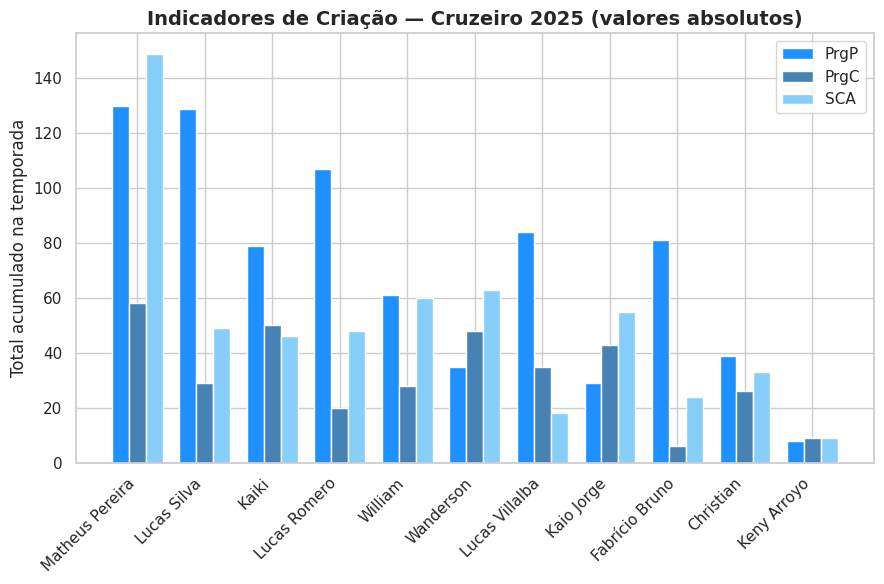

In [35]:
# Selecionar colunas relevantes e calcular soma absoluta
cols = ['Jogador', 'PrgP', 'PrgC', 'SCA']
df_plot = data[cols].copy()
df_plot['Criação_Total'] = df_plot['PrgP'] + df_plot['PrgC'] + df_plot['SCA']

# Ordenar do maior para o menor
df_plot = df_plot.sort_values('Criação_Total', ascending=False).reset_index(drop=True)

# Eixo x e largura
x = np.arange(len(df_plot))
width = 0.25

plt.figure(figsize=(9,6))

# Barras agrupadas (ordenadas)
plt.bar(x - width, df_plot['PrgP'], width, label='PrgP', color='#1E90FF')
plt.bar(x, df_plot['PrgC'], width, label='PrgC', color='#4682B4')
plt.bar(x + width, df_plot['SCA'], width, label='SCA', color='#87CEFA')

# Eixos e legendas
plt.xticks(x, df_plot['Jogador'], rotation=45, ha='right')
plt.ylabel('Total acumulado na temporada')
plt.title('Indicadores de Criação — Cruzeiro 2025 (valores absolutos)', fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

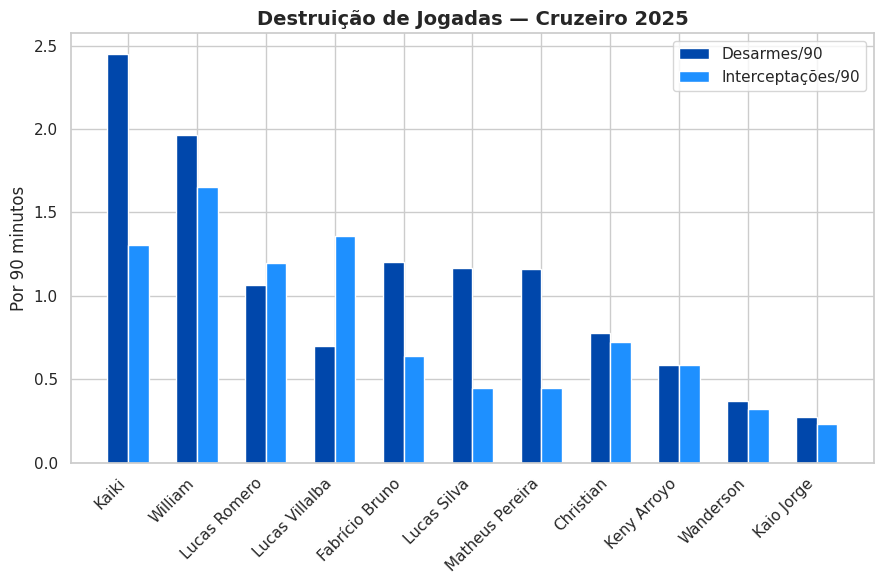

In [37]:
# Selecionar colunas relevantes e criar soma defensiva
cols = ['Jogador', 'TklW/90', 'Int/90']
df_def = data[cols].copy()
df_def['Destruição_Total'] = df_def['TklW/90'] + df_def['Int/90']

# Ordenar do mais destrutivo para o menos
df_def = df_def.sort_values('Destruição_Total', ascending=False).reset_index(drop=True)

# Eixo x
x = np.arange(len(df_def))
width = 0.3

plt.figure(figsize=(9,6))

# Barras agrupadas
plt.bar(x - width/2, df_def['TklW/90'], width, label='Desarmes/90', color='#0047AB')
plt.bar(x + width/2, df_def['Int/90'], width, label='Interceptações/90', color='#1E90FF')

# Eixos e legendas
plt.xticks(x, df_def['Jogador'], rotation=45, ha='right')
plt.ylabel('Por 90 minutos')
plt.title('Destruição de Jogadas — Cruzeiro 2025', fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

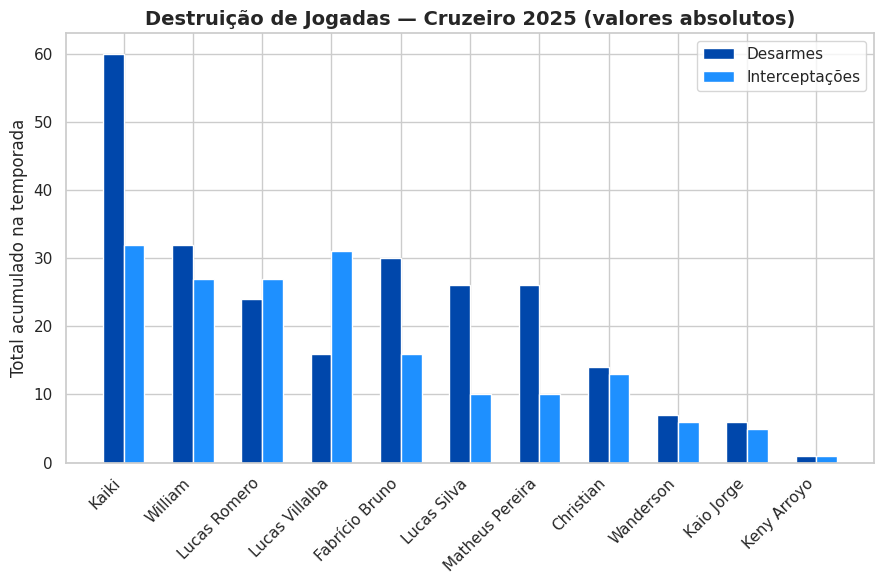

In [38]:
# Selecionar colunas relevantes e criar soma absoluta
cols = ['Jogador', 'TklW', 'Int']
df_def = data[cols].copy()
df_def['Destruição_Total'] = df_def['TklW'] + df_def['Int']

# Ordenar do mais destrutivo para o menos
df_def = df_def.sort_values('Destruição_Total', ascending=False).reset_index(drop=True)

# Eixo x
x = np.arange(len(df_def))
width = 0.3

plt.figure(figsize=(9,6))

# Barras agrupadas (absolutas)
plt.bar(x - width/2, df_def['TklW'], width, label='Desarmes', color='#0047AB')
plt.bar(x + width/2, df_def['Int'], width, label='Interceptações', color='#1E90FF')

# Eixos e legendas
plt.xticks(x, df_def['Jogador'], rotation=45, ha='right')
plt.ylabel('Total acumulado na temporada')
plt.title('Destruição de Jogadas — Cruzeiro 2025 (valores absolutos)', fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

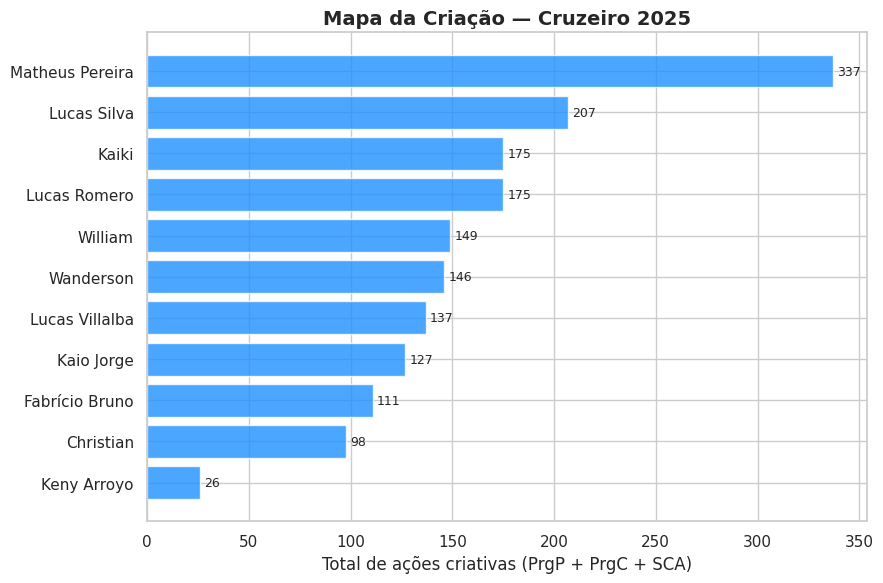

In [39]:
# Criar DataFrame auxiliar
cols = ['Jogador', 'PrgP', 'PrgC', 'SCA']
df_criacao = data[cols].copy()
df_criacao['Criação_Total'] = df_criacao['PrgP'] + df_criacao['PrgC'] + df_criacao['SCA']

# Ordenar do maior pro menor
df_criacao = df_criacao.sort_values('Criação_Total', ascending=False).reset_index(drop=True)

plt.figure(figsize=(9,6))
bars = plt.barh(df_criacao['Jogador'], df_criacao['Criação_Total'], color='#1E90FF', alpha=0.8)
plt.xlabel('Total de ações criativas (PrgP + PrgC + SCA)')
plt.title('Mapa da Criação — Cruzeiro 2025', fontsize=14, weight='bold')

# Adicionar valores
for i, v in enumerate(df_criacao['Criação_Total']):
    plt.text(v + 2, i, f'{v:.0f}', va='center', fontsize=9)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()